## MLP Classifier

MVIDIA, Exercise 1, Task 2

Author: Eetu Knutars

January 15th 2025

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import torch

Loading data from the .mat file

In [2]:
data = sio.loadmat('data.mat')["data"]
np.random.shuffle(data)
x = data[:, 0:2]
y = data[:, 2]

Using PyTorch for implementation. Defining a simple network with two hidden linear layers. Using ReLu activation between hidden layers. Using sigmoid function to result binary output.

In [3]:
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(2, 10)
        self.fc2 = torch.nn.Linear(10, 10)
        self.fc3 = torch.nn.Linear(10, 10)
        self.fc4 = torch.nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        # binary classification
        x = torch.sigmoid(self.fc4(x))
        return x
    
model = MLP()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Defining train and test sets

In [4]:
train_size = int(0.75 * len(x))
x_train = x[:train_size]
y_train = np.matrix(y[:train_size]).T
x_test = x[train_size:]
y_test = np.matrix(y[train_size:]).T

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

Training model, 1000 epochs. Didn't use any validation for this simple case

In [5]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss {loss.item()}')

Epoch 0, Loss 0.685284435749054
Epoch 100, Loss 0.14419442415237427
Epoch 200, Loss 0.061826303601264954
Epoch 300, Loss 0.05638758838176727
Epoch 400, Loss 0.05391072481870651
Epoch 500, Loss 0.05389976501464844
Epoch 600, Loss 0.053423646837472916
Epoch 700, Loss 0.05859919264912605
Epoch 800, Loss 0.06722626090049744
Epoch 900, Loss 0.05359712615609169


Calculating the model performance (accuracy)

In [6]:
model.eval()
y_pred = model(x_test)
y_pred = y_pred.detach().numpy()
y_pred = np.round(y_pred)

y_test = y_test.numpy()
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


Classifier function to make life easier

In [7]:
def mlp_classifier(x):
    x = torch.tensor(x, dtype=torch.float32)
    y = model(x)
    y = y.detach().numpy()
    y = np.round(y)
    return y

Visualizing the decision regions

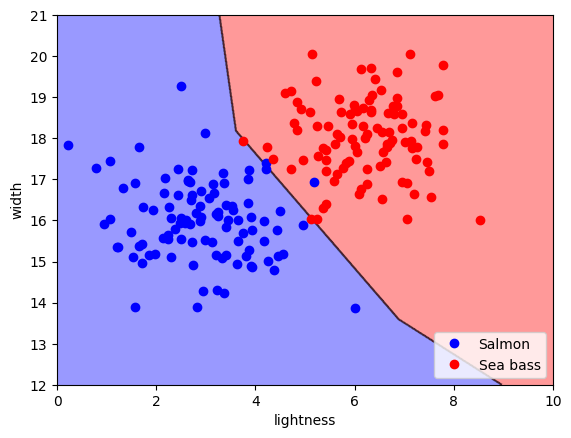

In [9]:
X, Y = np.meshgrid(np.linspace(0, 10, 1000), np.linspace(12, 21, 1000))

# Reshape the input to match the expected input dimensions of the model
input_data = np.vstack([np.ravel(X), np.ravel(Y)]).T
Z = mlp_classifier(input_data)
Z = Z.reshape(X.shape)
plt.contourf(X, Y, Z, levels=[-100, .1, .2, 100], colors=["blue", "grey", "red", ""], alpha=0.4)
plt.contour(X, Y, Z, levels=[-1, 0, 1], colors=["black"], alpha=0.6)
plt.plot(x[np.where(y == 0), 0].T, x[np.where(y == 0), 1].T, 'bo', label="Salmon")
plt.plot(x[np.where(y == 1), 0].T, x[np.where(y == 1), 1].T, 'ro', label="Sea bass")
plt.legend(loc=4)
plt.xlabel("lightness")
plt.ylabel("width")
plt.show()